<a href="https://colab.research.google.com/github/hodades/Mastering-Sentiment-Analysis-with-Transformers-An-In-Depth-Guide/blob/main/Copie_de_Module_2_(Exercice)_Syst%C3%A8me_de_recherche_s%C3%A9mantique_dans_les_vid%C3%A9os.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Module 2 (5 heures) - Système de recherche sémantique dans les vidéos

Q (Question) : Comment permettre aux utilisateurs d'effectuer des recherches sémantiques au sein du contenu vidéo?



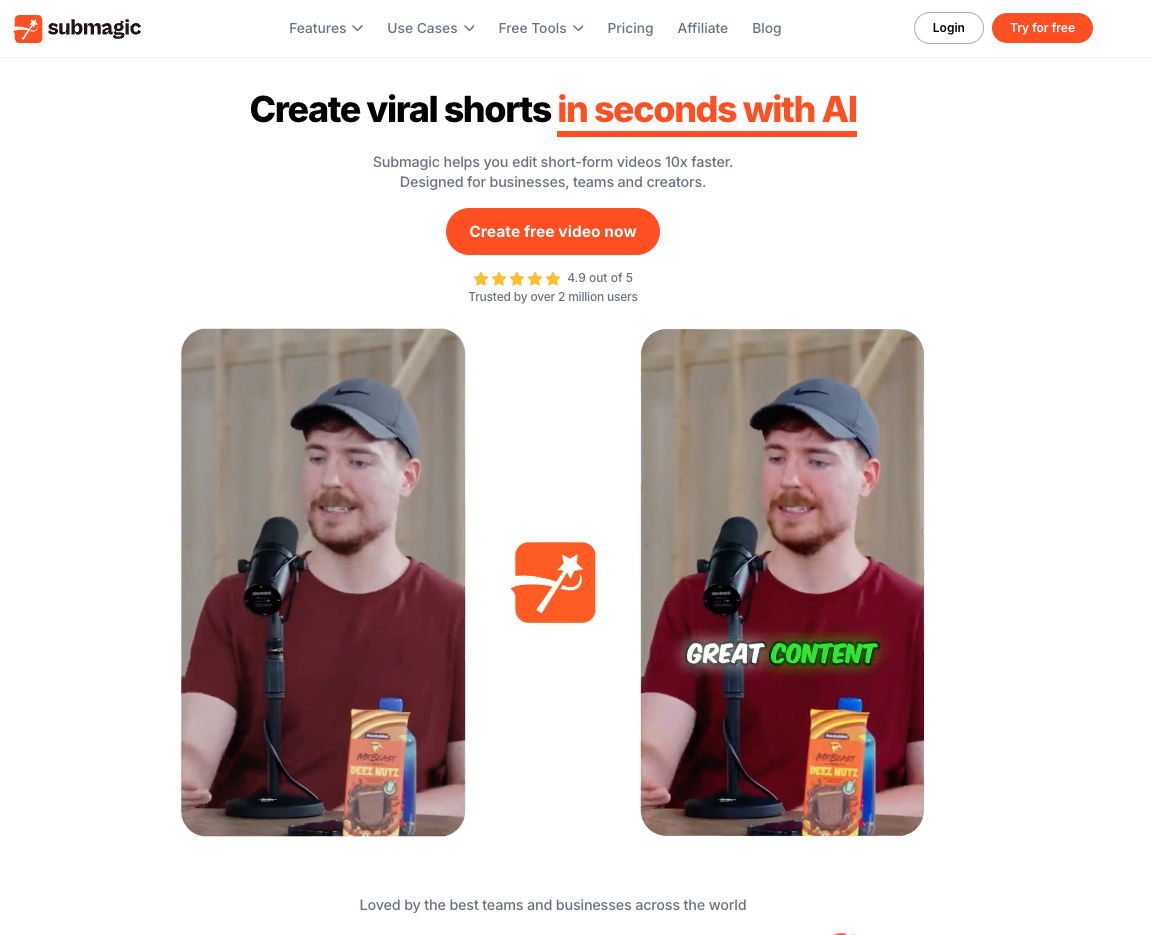

A la fin de ce cours vous allez mieux comprendre comment submagic a developpé certaines des fonctionnalités

**Dans ce module les parties où vous pouvez utiliser Chatgpt comme assistant seront marquées avec un 🤖🤖🤖**

# Partie 1: Récupération des videos du module 1 + visualisation

### 1.  Exécuter le code ci-dessous pour uploader le csv des videos de la veille


In [ ]:
# Import du CSV initial
import pandas as pd
from google.colab import files
import ast

# Step 1: Upload CSV file
uploaded = files.upload()

# Step 2: Load the CSV file into a pandas DataFrame
# The uploaded file will be in the 'uploaded' dictionary with the filename as the key
# Replace 'your_file.csv' with the actual filename of the uploaded CSV file
filename = list(uploaded.keys())[0]  # Get the uploaded file name dynamically
df = pd.read_csv(filename)
videos_with_metadata = df.to_dict('records')




### 2. Vérifier que tous les champs sont là. Quel est le format de transcript et tags? Comment faire pour les mettre sous le bon format (hint: librairie ast?)

In [ ]:
print(type(videos_with_metadata[0]['tags']))
videos_with_metadata[0]['tags']

In [ ]:
data = {
    'tags': ["['coding', 'python', 'development']", "['data science', 'AI', 'machine learning']"]
}
df = pd.DataFrame(data)

df['tags'] = df['tags'].apply(ast.literal_eval)


print(df['tags'].apply(type))
print(df)


0    <class 'list'>
1    <class 'list'>
Name: tags, dtype: object
                                   tags
0         [coding, python, development]
1  [data science, AI, machine learning]


### 3. Faire une étude statistique sur la longueur des transcripts (nombre de mots, nombre de charactères etc), les mots qui reviennent le plus et la durée des video. Pour les mots qui reviennent le plus, pouvez-vous enlever les stop words (regarder sur internet ce que c'est).


A quelle vitesse en moyenne le youtuber parle t-il (nombre de mots par min)?

In [ ]:

# Liste de stop words
stop_words = {"the", "is", "in", "and", "to", "for", "a", "of", "with", "on", "that", "this", "it", "an"}

# Exemple de données
data = [
    {'transcript': 'This is an example transcript for a video.', 'duration_seconds': 120},
    {'transcript': 'Another video with more content to analyze.', 'duration_seconds': 180}
]

df = pd.DataFrame(data)

# Calculs optimisés
df['word_count'] = df['transcript'].str.split().str.len()
df['char_count'] = df['transcript'].str.len()
df['most_common_word'] = df['transcript'].apply(lambda x: max((w for w in x.lower().split() if w not in stop_words), key=x.lower().split().count, default=None))
df['words_per_minute'] = df['word_count'] / (df['duration_seconds'] / 60)

# Résultat final
df[['word_count', 'char_count', 'most_common_word', 'words_per_minute']]


,word_count,char_count,most_common_word,words_per_minute
0,8,42,example,4.000000
1,7,43,another,2.333333


### 4. Faites une visualisation des statistiques avec des histogrammes. Pour cela lisez la documentatioon sur https://matplotlib.org/stable/plot_types/index

### 4.(🤖🤖🤖) A l'aide de Chatgpt, coder un interface (sur google colab) pour pouvoir visualiser les videos comme si vous etiez sur youtube, avec en plus les tags, level etc

Exemple: 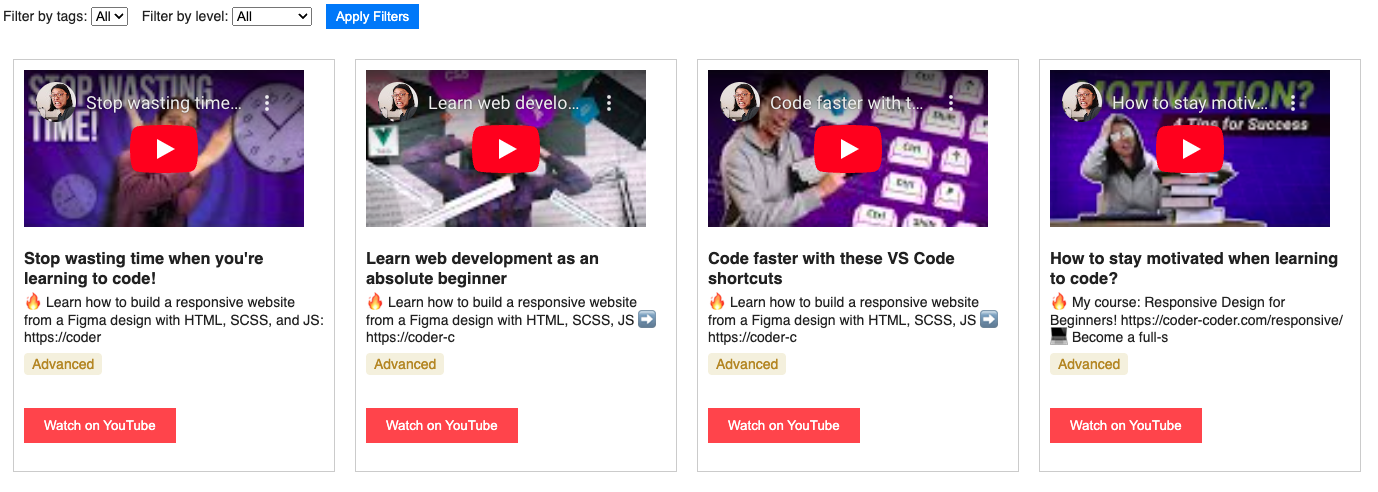

### 5. Demander à Chatgpt de rajouter des filtre en haut par rapport au niveau et par rapport aux tags

# **Partie 2: Faire une recherche sur video spécifique**

##Objectif:
Le but ici est de laisser l'utilisateur faire une recherche et de donner le moment ou les moments exacts ou la personne parle d'un sujet dans la video.

### Instructions





5. Voyez-vous des limites? Essayez votre fonction avec:

 https://www.youtube.com/watch?v=oFfVt3S51T4






### 1.  Revoir comment le transcript est enregistré et réfléchir à comment le système fonctionnerait. Vous pouvez confronter votre approche avec votre voisin/voisine

### 2. Faire une fonction qui prend en entrée une video de la base de donnée (avec tous les champs dont transcript), une recherche d'utilisateur, et en sortir une liste de périodes (clips) qui correspondraient à la recherche, avec pour chaque période un petit titre.

💡 Hint: Pour cela vous pouvez créer un model pydantic: "VideoClip" et "Clips"

Donner les urls finales des différents clips. Pour pouvoir rediriger vers un moment spécifique d'une video il suffit de rajoute le paramètre "?t={timestamp}" dans l'url:

exemple: https://www.youtube.com/watch?v=ysEN5RaKOlA&t=285

### 4. Faire une fonction maintenant qui demande à l'utilisateur l'url d'une video youtube, une terme de recherche et qui montre les meilleurs clips qui répondent à sa recherche. Vous allez devoir utiliser ce qui a été fait au jour 1.

💡 Hint: Pour la partie interface vous pouvez utiliser une fonction avec boucle while et utiliser "input"

## (🤖🤖🤖) Pour les plus courageux:

Créer une vrai interface à l'aide d'une api Python, où l'utilisateur doit d'abors donner l'url d'un video. Vous affichez les informations de la video (image/tags etc), puis la personne peux faire un query et vous affichez les meilleurs clips de la video.

Vous présenterez le résultat à la classe!